## **QUESTION 1**

In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [117]:
# Importing data from google drive
dataset = pd.read_csv('/content/drive/MyDrive/prml/lab-3/titanic.csv')
dataset.head()

,PassengerId,Name,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,373450,8.0500,NaN,S,0


In [118]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   Ticket       891 non-null    object 
 6   Fare         891 non-null    float64
 7   Cabin        204 non-null    object 
 8   Embarked     889 non-null    object 
 9   Survived     891 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


In [119]:
dataset.describe()

,PassengerId,Pclass,Age,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,32.204208,0.383838
std,257.353842,0.836071,14.526497,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,512.329200,1.000000


'Cream Lines in the graph indicates the empty values'

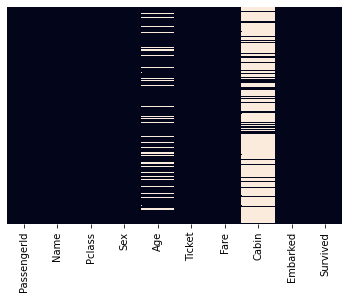

In [120]:
#checking the empty values
dataset.isnull()
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False)
'''Cream Lines in the graph indicates the empty values'''

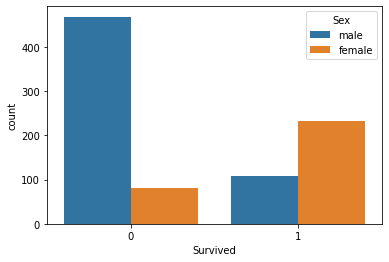

In [121]:
#Visualising number of people survived based on gender
sns.countplot(x='Survived',hue='Sex',data=dataset)

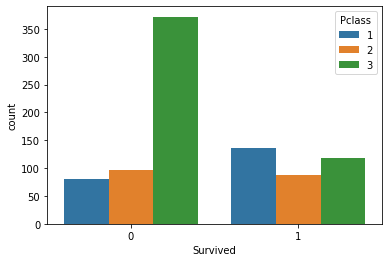

In [122]:
#Visualising number of people survived based on Pclass
sns.countplot(x='Survived',hue='Pclass',data=dataset)

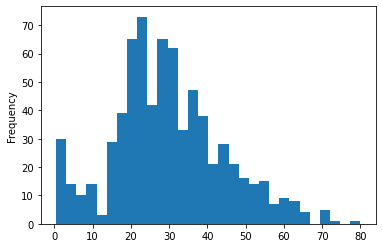

In [123]:
#Histogram visualisation of people of different age in Titanic
dataset['Age'].plot.hist(bins=30)

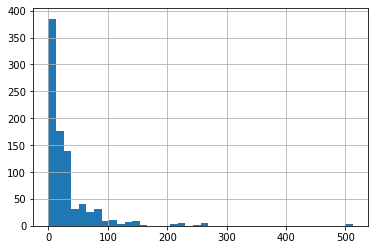

In [124]:
#Histogram Visualisation of Fare paid by the people
dataset['Fare'].hist(bins=40)

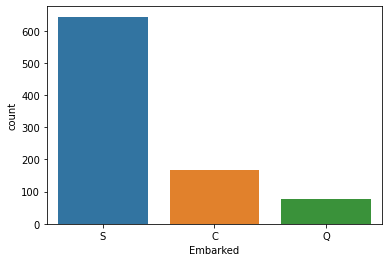

In [125]:
#Visualisation of Embarkment of people
sns.countplot(x='Embarked',data=dataset)

In [126]:
#Filling the missing data
##Filling the AGE column based on the average age of the persons from different pclass
result = dataset.groupby('Pclass')['Age'].mean()
print("Mean of ages based on",result)

Mean of ages based on Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [127]:
##Function to fill the missing age data based on Pclass
def fill_age(col):
  age = col[0]
  pclass= col[1]
  if pd.isnull(age):
    if pclass==1:
      return 38.233441
    elif pclass==2:
      return 29.877630
    else:
      return 25.140620
  else:
    return age        

'Cream lines indicate missing values'

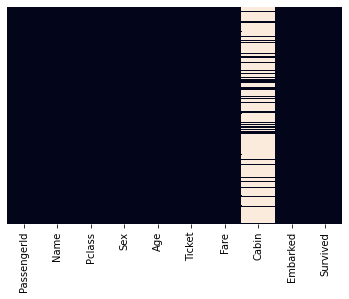

In [128]:
# #calling the function and filling the missing values 
dataset['Age'] = dataset[['Age','Pclass']].apply(fill_age,axis=1)

#Plotting heatmap
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False)
'''Cream lines indicate missing values'''

In [129]:
##Dropping the Cabin column since there are so many null values
dataset.drop('Cabin',axis=1,inplace=True)
dataset.head()

,PassengerId,Name,Pclass,Sex,Age,Ticket,Fare,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,A/5 21171,7.2500,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,PC 17599,71.2833,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,113803,53.1000,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,373450,8.0500,S,0


'Dataset is clean there are no more missing values'

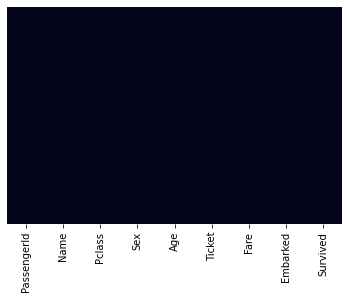

In [130]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False)
'''Dataset is clean there are no more missing values'''

In [131]:
##Converting the string values of a column into dummy values of 0 and 1
gender = pd.get_dummies(dataset['Sex'],drop_first=True)
embark = pd.get_dummies(dataset['Embarked'],drop_first=True)
pclass = pd.get_dummies(dataset['Pclass'],drop_first=True)

In [132]:
##Adding these new columns to the dataset
dataset = pd.concat([dataset,gender,embark,pclass],axis=1)
dataset.head()

,PassengerId,Name,Pclass,Sex,Age,Ticket,Fare,Embarked,Survived,male,Q,S,2,3
0,1,"Braund, Mr. Owen Harris",3,male,22.0,A/5 21171,7.2500,S,0,1,0,1,0,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,PC 17599,71.2833,C,1,0,0,0,0,0
2,3,"Heikkinen, Miss. Laina",3,female,26.0,STON/O2. 3101282,7.9250,S,1,0,0,1,0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,113803,53.1000,S,1,0,0,1,0,0
4,5,"Allen, Mr. William Henry",3,male,35.0,373450,8.0500,S,0,1,0,1,0,1


In [133]:
##Dropping the columns
dataset.drop(['Sex','Embarked','Name','Ticket','PassengerId','Pclass'],axis=1,inplace=True)
dataset.head()

,Age,Fare,Survived,male,Q,S,2,3
0,22.0,7.2500,0,1,0,1,0,1
1,38.0,71.2833,1,0,0,0,0,0
2,26.0,7.9250,1,0,0,1,0,1
3,35.0,53.1000,1,0,0,1,0,0
4,35.0,8.0500,0,1,0,1,0,1


In [134]:
'''Data Preprocessing is completed and dropping of the un-used columns 
is also completed and we can now split our dataset into train and test sets'''

'Data Preprocessing is completed and dropping of the un-used columns \nis also completed and we can now split our dataset into train and test sets'

In [135]:
##Splitting data into train and test sets
X = dataset.drop('Survived',axis=1)
y = dataset['Survived']

In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [137]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(623, 7) (268, 7) (623,) (268,)


In [138]:
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Fare      891 non-null    float64
 2   Survived  891 non-null    int64  
 3   male      891 non-null    uint8  
 4   Q         891 non-null    uint8  
 5   S         891 non-null    uint8  
 6   2         891 non-null    uint8  
 7   3         891 non-null    uint8  
dtypes: float64(2), int64(1), uint8(5)
memory usage: 25.4 KB


,Age,Fare,Survived,male,Q,S,2,3
0,22.0,7.2500,0,1,0,1,0,1
1,38.0,71.2833,1,0,0,0,0,0
2,26.0,7.9250,1,0,0,1,0,1
3,35.0,53.1000,1,0,0,1,0,0
4,35.0,8.0500,0,1,0,1,0,1


### **Identifying the best variant of Naive Bayes Classifier**

There are three variants of Naive Bayes Classifiers we can choose for classification:


*   Gaussian Naive Bayes: Continuous Features

*   Bernoulli Naive Bayes: Binary Features

*   Multinomial Naive Bayes: Categorical Features








In [139]:
## Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score

##Calculating the accuracy with Gaussian Naive Bayes Classifier
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train) #Training the model using the training data sets
y_pred_gaussian = gaussian_nb.predict(X_test) #Predict the response for test dataset
accuracy_gaussian = accuracy_score(y_test, y_pred_gaussian)
print("Gaussian Naive Bayes Classifier Accuracy:", accuracy_gaussian)

##Calculating the accuracy with Multinomial Naive Bayes Classifier
multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_train, y_train)
y_pred_multinomial = multinomial_nb.predict(X_test)
accuracy_multinomial = accuracy_score(y_test, y_pred_multinomial)
print("\nMultinomial Naive Bayes Classifier Accuracy:", accuracy_multinomial)

##Calculating the accuracy with Bernoulli Naive Bayes Classifier
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train, y_train)
y_pred_bernoulli = bernoulli_nb.predict(X_test)
accuracy_bernoulli = accuracy_score(y_test, y_pred_bernoulli)
print("\nBernoulli Naive Bayes Classifier Accuracy:", accuracy_bernoulli)
print("\n")

Gaussian Naive Bayes Classifier Accuracy: 0.7835820895522388

Multinomial Naive Bayes Classifier Accuracy: 0.7014925373134329

Bernoulli Naive Bayes Classifier Accuracy: 0.7798507462686567




/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklea

### After calculating the accuracy with all the three naive bayes classifiers we get the highest accuracy from the Gaussian Naive Bayes Classifier

### Therefore, the best possible variant of the Naive Bayes Classifier for the dataset is **Gaussian Naive Bayes Classifeir**

In [140]:
##Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_gaussian)
print("Confusion matrix\n",cm)

Confusion matrix
 [[135  22]
 [ 36  75]]


### **Plotting the curve (ROC and AUC)**


Area under ROC Curve is:  0.8237791932059448


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


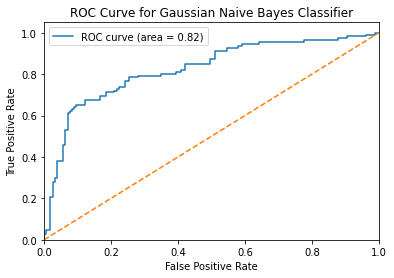

In [141]:
from sklearn.metrics import roc_curve, auc

#Predicting the probabilities of class for each instance in test dataset 
y_prob = gaussian_nb.predict_proba(X_test)

#Computing the false positive rate, true positive rate and threshold
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
print("\nArea under ROC Curve is: ",auc(fpr,tpr))
#Plotting the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gaussian Naive Bayes Classifier')
plt.legend(loc="upper left")
plt.show()

### **Performing 5 fold cross-validation**

In [227]:
from sklearn.model_selection import KFold,cross_val_score

scores_nb = np.array(cross_val_score(gaussian_nb, X_train, y_train, cv=5))
print("Mean Validation NB Score: ",np.mean(scores_nb))
print("Variance in NB validation Score: ",np.var(scores_nb),'\n\n')


kfold = KFold(n_splits=5, random_state=None, shuffle=True)

#Initializing a list to store the accuracy results
accuracy_results = []

#Copying the data in an array
dataset_copy = np.array(X)

#Looping through each fold
for train_index, test_index in kfold.split(dataset_copy):
  x_train, x_test = dataset_copy[train_index], dataset_copy[test_index]
  Y_train, Y_test = y[train_index], y[test_index]

  #Training the Gaussian Naive Bayes Classifier
  model = GaussianNB()
  model.fit(x_train, Y_train)

  #Making predictions on test data
  Y_predictions = model.predict(x_test)
  p = model.predict(x_test)[1]
  q = model.predict(x_test)[0]
  #Calculating accuracy score
  acc = accuracy_score(Y_test, Y_predictions)

  #Appending the accuracy score to the results list
  accuracy_results.append(acc)
    
  #Compute the probability of the top class
  probability = model.predict_proba(x_test)
  top_class = np.argmax(probability, axis=1)  
  # top_class_prob = probability[np.arange(len(probability)), top_class]
  print("First ten predictions",top_class[:10])
  print("Actual Classes: ",np.array(Y_test)[:10])
  print("Accuracy: ",accuracy_score(np.array(Y_test)[:10], top_class[:10]))
  print("Average Cofidence of top class: ",np.mean(probability),"\n")

print("Accuracy results for 5 fold Cross-validation\n",accuracy_results)
# Calculating the average accuracy across all folds
average_accuracy = np.mean(accuracy_results)
print("\nAverage accuracy:", average_accuracy,'\n\n') 

Mean Validation NB Score:  0.7832387096774195
Variance in NB validation Score:  0.004523861644120709 


First ten predictions [0 1 1 0 0 0 0 1 0 0]
Actual Classes:  [1 1 1 0 0 1 0 1 0 1]
Accuracy:  0.7
Average Cofidence of top class:  0.5000000000000001 

First ten predictions [0 0 0 0 0 1 1 0 0 0]
Actual Classes:  [0 0 0 1 0 0 1 0 0 0]
Accuracy:  0.8
Average Cofidence of top class:  0.5 

First ten predictions [1 0 1 0 1 0 1 0 1 0]
Actual Classes:  [1 1 1 0 1 0 1 0 1 0]
Accuracy:  0.9
Average Cofidence of top class:  0.5000000000000001 

First ten predictions [0 0 0 0 0 0 1 0 1 0]
Actual Classes:  [0 0 0 0 1 1 1 0 0 0]
Accuracy:  0.7
Average Cofidence of top class:  0.5 

First ten predictions [0 1 1 1 0 1 0 1 1 0]
Actual Classes:  [0 1 0 1 1 0 0 1 0 0]
Accuracy:  0.6
Average Cofidence of top class:  0.5 

Accuracy results for 5 fold Cross-validation
 [0.770949720670391, 0.7584269662921348, 0.8202247191011236, 0.8089887640449438, 0.7808988764044944]

Average accuracy: 0.78789780930261

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklea

### **Contour plots with data points to visualize the class-conditional densities**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. 

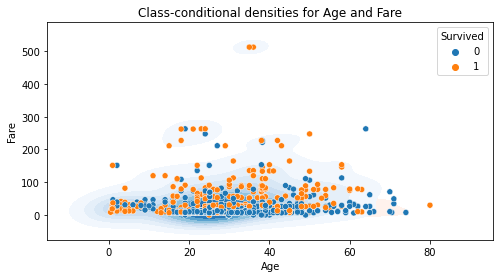

In [160]:
# Plot the class-conditional densities for Age and Fare
sns.kdeplot(dataset[dataset['Survived'] == 0]['Age'], dataset[dataset['Survived'] == 0]['Fare'], cmap="Reds", shade=True, shade_lowest=False)
sns.kdeplot(dataset[dataset['Survived'] == 1]['Age'], dataset[dataset['Survived'] == 1]['Fare'], cmap="Blues", shade=True, shade_lowest=False)

# Add the data points to the plot
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=dataset)

# Label the plot
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Class-conditional densities for Age and Fare')

# Show the plot
plt.show()

### **Comparison with Decision Tree Classifier**

In [235]:
from sklearn.tree import DecisionTreeClassifier as DTC
dtc_classifier = DTC()
scores_dt = cross_val_score(dtc_classifier, X_train, y_train, cv=5)
print("Mean Validation DT Score: ",np.mean(scores_dt))
print("Variance in DT validation Score: ",np.var(scores_dt))


kfold_dt = KFold(n_splits=5, random_state=None, shuffle=True)

#Initializing a list to store the accuracy results
accuracy_results_dt = []

#Copying the data in an array
dataset_copy_dt = np.array(X)

#Looping through each fold
for train_index_dt, test_index_dt in kfold_dt.split(dataset_copy_dt):
  x_train_dt, x_test_dt = dataset_copy_dt[train_index_dt], dataset_copy_dt[test_index_dt]
  Y_train_dt, Y_test_dt = y[train_index_dt], y[test_index_dt]

  #Training the Gaussian Naive Bayes Classifier
  model_dt = DTC()
  model_dt.fit(x_train_dt, Y_train_dt)

  #Making predictions on test data
  Y_predictions_dt = model_dt.predict(x_test_dt)

  #Calculating accuracy score
  acc_dt = accuracy_score(Y_test_dt, Y_predictions_dt)

  #Appending the accuracy score to the results list
  accuracy_results_dt.append(acc_dt)

print("Accuracy results for 5 fold Cross-validation\n",accuracy_results_dt)

# Calculating the average accuracy across all folds
average_accuracy_dt = np.mean(accuracy_results_dt)
print("\nAverage accuracy of Decision Tree:", average_accuracy_dt,'\n\n') 

Mean Validation DT Score:  0.7753161290322581
Variance in DT validation Score:  0.00047162139438085336
Accuracy results for 5 fold Cross-validation
 [0.8379888268156425, 0.8258426966292135, 0.7865168539325843, 0.7808988764044944, 0.7359550561797753]

Average accuracy of Decision Tree: 0.793440461992342 




/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklea

# **QUESTION 2**

### **Histogram to plot the distribution of samples**

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

dataset2 = pd.read_csv("/content/drive/MyDrive/prml/lab-3/dataset (1).csv")
dataset2.head()

,X0,X1,X2,X3,X4,X5,X6,Y
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [146]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X0      210 non-null    float64
 1   X1      210 non-null    float64
 2   X2      210 non-null    float64
 3   X3      210 non-null    float64
 4   X4      210 non-null    float64
 5   X5      210 non-null    float64
 6   X6      210 non-null    float64
 7   Y       210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca2feda6d0>,
      dtype=object)

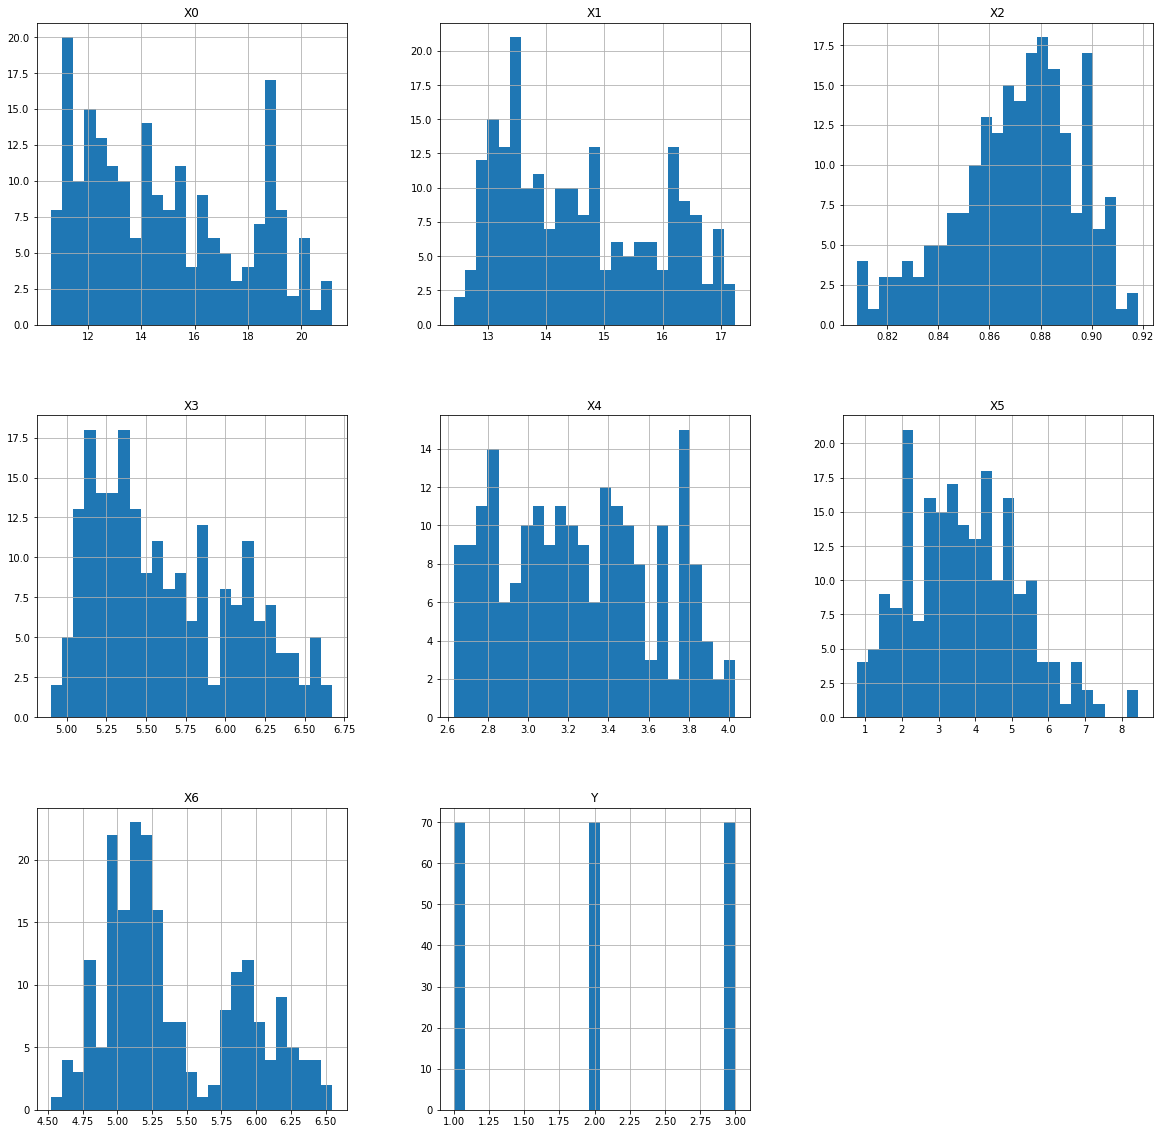

In [147]:
dataset2.hist(bins=25, figsize=(20,20))

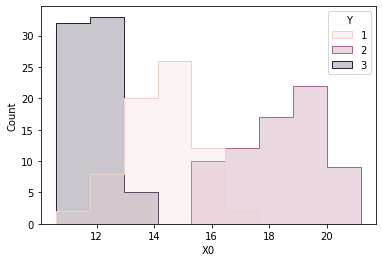

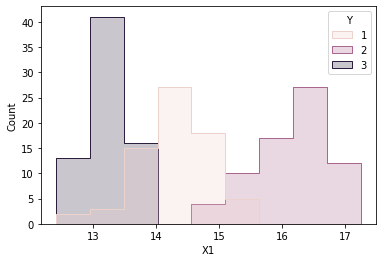

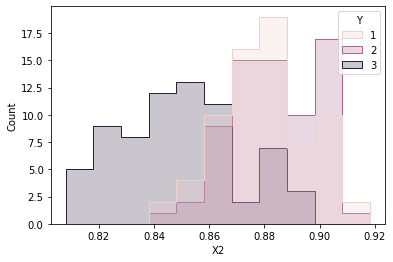

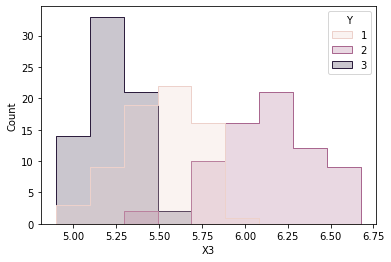

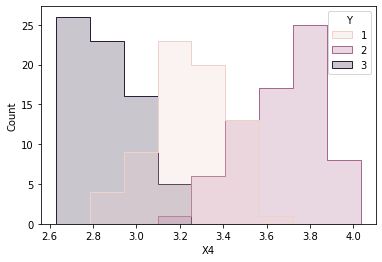

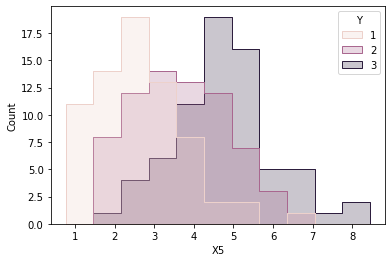

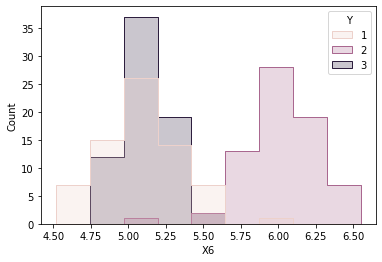

In [148]:
for col in dataset2.columns:
  if col != "Y":
    sns.histplot(data=dataset2, x=col, hue='Y',element='step')
    plt.show()

### **Calculating the Prior Probability for all classes**

In [149]:
one_cnt = 0
two_cnt = 0
three_cnt = 0
for i in dataset2['Y']:
  if i==1:
    one_cnt += 1
  elif i==2:
    two_cnt += 1
  elif i==3:
    three_cnt += 1 

print("Count of class 1 in Y: ",one_cnt)
print("Count of class 2 in Y: ",two_cnt)
print("Count of class 3 in Y: ",three_cnt)
print("\nPrior probability of class 1: ", one_cnt/len(dataset2['Y']))
print("Prior probability of class 2: ", two_cnt/len(dataset2['Y']))
print("Prior probability of class 3: ", three_cnt/len(dataset2['Y']))

Count of class 1 in Y:  70
Count of class 2 in Y:  70
Count of class 3 in Y:  70

Prior probability of class 1:  0.3333333333333333
Prior probability of class 2:  0.3333333333333333
Prior probability of class 3:  0.3333333333333333


###  **Discretize the features into bins**

In [264]:
def discretize_feature(feature, n_bins):
    # Calculate minimum and maximum value
    feature_min = np.min(feature)
    feature_max = np.max(feature)
    bin_width = (feature_max - feature_min) / n_bins
    
    # Discretize feature
    bins = [feature_min + i * bin_width for i in range(n_bins + 1)]
    discretized_feature = [int(round((value - feature_min) / bin_width)) for value in feature]
    
    return discretized_feature

In [270]:
for f in dataset2.drop('Y',axis=1):
  dataset2[f] = discretize_feature(np.array(dataset2[f]),5)

print(dataset2)

     X0  X1  X2  X3  X4  X5  X6  Y
0     2   3   3   2   2   1   2  1
1     2   2   3   2   3   0   1  1
2     2   2   4   1   3   1   1  1
3     2   2   4   1   3   1   1  1
4     3   3   4   2   3   0   2  1
..   ..  ..  ..  ..  ..  ..  .. ..
205   1   1   3   1   1   2   1  3
206   0   0   2   1   1   2   1  3
207   1   1   4   1   2   5   1  3
208   1   1   2   1   1   2   1  3
209   1   1   3   1   1   3   1  3

[210 rows x 8 columns]


###  **Determining the likelihood/class conditional probabilities**

In [290]:
def calculate_class_probabilities(data,target):
    class_pro = {}
    uniClasses = np.unique(target)
    print(uniClasses)

    for col in data.columns:
      uniFeatures = data[col].value_counts()
      
    for cls in uniClasses:
        class_indices = np.where(target == cls)
        # print(class_indices)
        class_data = data[class_indices]
        # print(class_data)
        # print(data.shape[1])
        for feature in range(data.shape[1]):
            # print(feature)
            values, counts = np.unique(class_data[:, feature], return_counts=True)
            total = np.sum(counts)
            for value, count in zip(values, counts):
                class_pro[cls][feature][value] = count / total

    return class_pro

### **Plotting count of each unique element for each class**

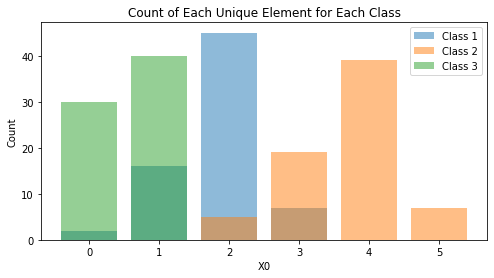

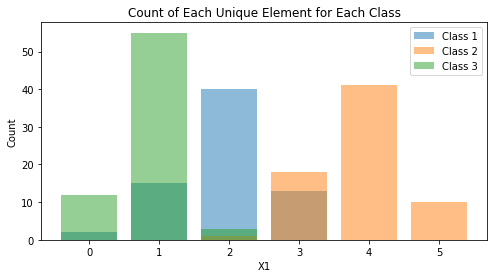

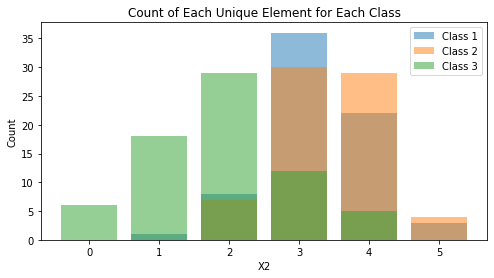

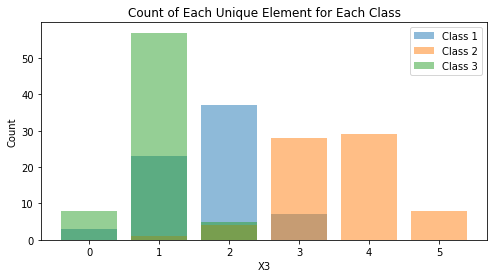

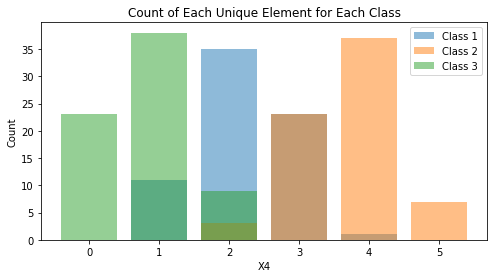

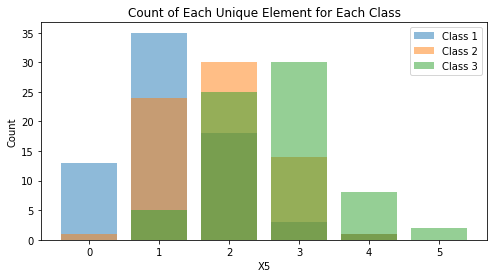

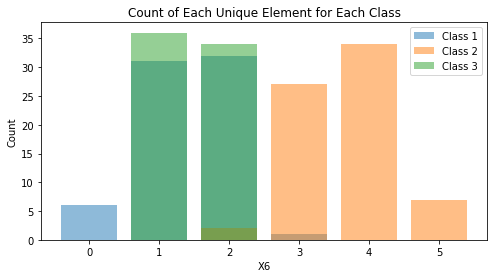

In [314]:
for col in dataset2.columns:
  if(col=='Y'):
    continue
  counts = {}
  for label in np.unique(dataset2['Y']):
    counts[label] = {}
    for element in np.unique(dataset2[col]):
        counts[label][element] = len(np.where((dataset2[col] == element) & (dataset2['Y'] == label))[0])

  # Plot the count of each unique element for each class
  for label, count_dict in counts.items():
    plt.bar(count_dict.keys(), count_dict.values(), alpha=0.5, label=f"Class {label}")

  plt.legend()
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.title("Count of Each Unique Element for Each Class")
  plt.show()